<a href="https://colab.research.google.com/github/Iveynganga/PYTHON-DATA-ANALYSIS/blob/main/Numpy5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy Exercise 5

### All of the questions in this exercise are attributed to rougier/numpy-100

#### 61. Find the nearest value from a given value in an array (★★☆)

In [ ]:
import numpy as np

given_value = 0.5

array = np.array([0.1, 0.3, 0.6, 0.8, 1.0])

absolute_differences = np.abs(array - given_value)

nearest_index = np.argmin(absolute_differences)

nearest_value = array[nearest_index]

#### 62. Considering two arrays with shape (1,3) and (3,1), how to compute their sum using an iterator? (★★☆)

In [ ]:
import numpy as np

array1 = np.array([[1, 2, 3]])
array2 = np.array([[4], [5], [6]])

sum_value = 0

for element1, element2 in zip(np.nditer(array1), np.nditer(array2)):
    sum_value += element1 + element2

#### 63. Create an array class that has a name attribute (★★☆)

In [ ]:
import numpy as np

class NamedArray(np.ndarray):
    def __new__(cls, input_array, name=None):
        obj = np.asarray(input_array).view(cls)
        obj.name = name
        return obj

    def __array_finalize__(self, obj):
        if obj is None:
            return
        self.name = getattr(obj, 'name', None)

arr = NamedArray([1, 2, 3, 4, 5], name="MyArray")


#### 64. Consider a given vector, how to add 1 to each element indexed by a second vector (be careful with repeated indices)? (★★★)

In [ ]:
import numpy as np

vector = np.array([1, 2, 3, 4, 5])

indices = np.array([0, 1, 1, 3, 4])

unique_indices, counts = np.unique(indices, return_counts=True)

vector[unique_indices] += 1

vector[unique_indices[counts > 1]] -= counts[counts > 1] - 1

#### 65. How to accumulate elements of a vector (X) to an array (F) based on an index list (I)? (★★★)

In [ ]:
import numpy as np

X = np.array([1, 2, 3, 4, 5])
I = np.array([0, 2, 5, 7, 2, 5])

F_shape = np.max(I) + 1

F = np.zeros(F_shape)

for i, x in zip(I, X):
    F[i] += x


#### 66. Considering a (w,h,3) image of (dtype=ubyte), compute the number of unique colors (★★☆)

In [ ]:
import numpy as np

image = np.random.randint(0, 256, size=(100, 100, 3), dtype=np.uint8)

reshaped_image = image.reshape(-1, 3)

unique_colors = np.unique(reshaped_image, axis=0)

num_unique_colors = len(unique_colors)

#### 67. Considering a four dimensions array, how to get sum over the last two axis at once? (★★★)

In [ ]:
import numpy as np

array = np.random.randint(0, 10, size=(3, 4, 5, 6))

sum_last_two_axes = np.sum(array, axis=(-2, -1))

#### 68. Considering a one-dimensional vector D, how to compute means of subsets of D using a vector S of same size describing subset  indices? (★★★)

In [ ]:
import numpy as np

D = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
S = np.array([0, 1, 1, 2, 2, 2, 3, 3, 3])

unique_indices, counts = np.unique(S, return_counts=True)

subset_means = []
for index, count in zip(unique_indices, counts):
    subset = D[S == index]
    subset_mean = np.mean(subset)
    subset_means.append(subset_mean)

#### 69. How to get the diagonal of a dot product? (★★★)

In [ ]:
import numpy as np

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

B = np.array([[9, 8, 7],
              [6, 5, 4],
              [3, 2, 1]])

dot_product = np.dot(A, B)

diagonal_dot_product = np.diag(dot_product)

#### 70. Consider the vector [1, 2, 3, 4, 5], how to build a new vector with 3 consecutive zeros interleaved between each value? (★★★)

In [ ]:
import numpy as np

original_vector = np.array([1, 2, 3, 4, 5])

consecutive_zeros = 3

interleaved_elements = np.zeros((len(original_vector) - 1) * consecutive_zeros)

new_vector = np.concatenate([original_vector, interleaved_elements])

#### 71. Consider an array of dimension (5,5,3), how to mulitply it by an array with dimensions (5,5)? (★★★)

In [ ]:
import numpy as np

array_3d = np.random.randint(1, 10, size=(5, 5, 3))

array_2d = np.random.randint(1, 10, size=(5, 5))

result = array_3d * array_2d[:, :, np.newaxis]

#### 72. How to swap two rows of an array? (★★★)

In [ ]:
import numpy as np

array = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

array[0], array[1] = array[1], array[0]

#### 73. Consider a set of 10 triplets describing 10 triangles (with shared vertices), find the set of unique line segments composing all the  triangles (★★★)

In [ ]:
triangles = [
    [(0, 0), (1, 0), (0, 1)],
    [(1, 0), (1, 1), (0, 1)],
    [(1, 1), (2, 1), (2, 0)],
    [(2, 0), (1, 0), (1, 1)],
    [(2, 1), (1, 1), (1, 2)],
    [(1, 2), (2, 2), (2, 1)],
    [(2, 2), (1, 2), (1, 3)],
    [(1, 3), (2, 3), (2, 2)],
    [(2, 3), (1, 3), (1, 4)],
    [(1, 4), (2, 4), (2, 3)]
]

unique_segments = set()

for triangle in triangles:

    edges = [(triangle[i], triangle[(i + 1) % 3]) for i in range(3)]

    unique_segments.update(edges)

#### 74. Given a sorted array C that corresponds to a bincount, how to produce an array A such that np.bincount(A) == C? (★★★)

In [ ]:
import numpy as np

C = np.array([0, 1, 2, 0, 1, 1, 3, 1])

A = np.repeat(np.arange(len(C)), C)

#### 75. How to compute averages using a sliding window over an array? (★★★)

In [ ]:
import numpy as np

arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

window_size = 3

averages = np.convolve(arr, np.ones(window_size)/window_size, mode='valid')

#### 76. Consider a one-dimensional array Z, build a two-dimensional array whose first row is (Z[0],Z[1],Z[2]) and each subsequent row is  shifted by 1 (last row should be (Z[-3],Z[-2],Z[-1]) (★★★)

In [ ]:
import numpy as np

Z = np.array([1, 2, 3, 4, 5, 6, 7])

num_rows = len(Z) - 2

result_array = np.zeros((num_rows, 3), dtype=Z.dtype)

for i in range(num_rows):
    result_array[i] = Z[i:i+3]

#### 77. How to negate a boolean, or to change the sign of a float inplace? (★★★)

In [ ]:
boolean_var = True

boolean_var = not boolean_var

print("Negated boolean:", boolean_var)

Negated boolean: False


#### 78. Consider 2 sets of points P0,P1 describing lines (2d) and a point p, how to compute distance from p to each line i (P0[i],P1[i])? (★★★)

In [ ]:
import numpy as np

def distance_point_to_line(p, p0, p1):
    """
    Compute the distance from a point p to a line defined by points p0 and p1.
    """

    p = np.array(p)
    p0 = np.array(p0)
    p1 = np.array(p1)

    v = p1 - p0

    w = p - p0

    projection = np.dot(w, v) / np.dot(v, v) * v

    closest_point = p0 + projection

    distance = np.linalg.norm(p - closest_point)

    return distance

P0 = [(1, 1), (2, 3), (4, 5)]
P1 = [(4, 5), (5, 1), (6, 2)]
p = (3, 4)

distances = [distance_point_to_line(p, P0[i], P1[i]) for i in range(len(P0))]

#### 79. Consider 2 sets of points P0,P1 describing lines (2d) and a set of points P, how to compute distance from each point j (P[j]) to each line i (P0[i],P1[i])? (★★★)

In [ ]:
import numpy as np

def distance_point_to_line(point, p0, p1):
    """
    Compute the distance from a point to a line defined by two points.
    """
    point = np.array(point)
    p0 = np.array(p0)
    p1 = np.array(p1)

    v = p1 - p0

    w = point - p0

    projection = np.dot(w, v) / np.dot(v, v) * v

    distance = np.linalg.norm(w - projection)

    return distance

def distances_points_to_lines(points, P0, P1):
    """
    Compute the distances from each point to each line defined by pairs of points.
    """
    distances = np.zeros((len(points), len(P0)))

    for j, point in enumerate(points):
        for i, (p0, p1) in enumerate(zip(P0, P1)):
            distances[j, i] = distance_point_to_line(point, p0, p1)

    return distances

P0 = [(1, 1), (2, 3), (4, 5)]
P1 = [(4, 5), (5, 1), (6, 2)]
P = [(3, 4), (2, 1), (5, 5)]

distances = distances_points_to_lines(P, P0, P1)

#### 80. Consider an arbitrary array, write a function that extract a subpart with a fixed shape and centered on a given element (pad with a `fill` value when necessary) (★★★)

In [ ]:
import numpy as np

def extract_subpart(array, shape, center, fill_value=0):
    """
    Extract a subpart with a fixed shape centered on a given element,
    padding with a fill value when necessary.
    """
    lower_bounds = np.maximum(center - np.array(shape) // 2, 0)
    upper_bounds = np.minimum(lower_bounds + shape, array.shape)

    subpart = np.full(shape, fill_value, dtype=array.dtype)

    array_slice = tuple(slice(lower, upper) for lower, upper in zip(lower_bounds, upper_bounds))

    subpart_slice = tuple(slice(0, upper - lower) for lower, upper in zip(lower_bounds, upper_bounds))

    subpart[subpart_slice] = array[array_slice]

    return subpart

array = np.arange(1, 26).reshape(5, 5)

center = (2, 2)
shape = (3, 3)

subpart = extract_subpart(array, shape, center)

#### 81. Consider an array Z = [1,2,3,4,5,6,7,8,9,10,11,12,13,14], how to generate an array R = [[1,2,3,4], [2,3,4,5], [3,4,5,6], ..., [11,12,13,14]]? (★★★)

In [ ]:
import numpy as np

Z = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14])

window_size = 4

num_rows = len(Z) - window_size + 1

R = np.zeros((num_rows, window_size), dtype=Z.dtype)

for i in range(num_rows):
    R[i] = Z[i:i+window_size]

#### 82. Compute a matrix rank (★★★)

In [ ]:
import numpy as np

matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

rank = np.linalg.matrix_rank(matrix)

#### 83. How to find the most frequent value in an array?

In [ ]:
import numpy as np

array = np.array([1, 2, 3, 1, 2, 2, 3, 3, 3])

unique_values, counts = np.unique(array, return_counts=True)

most_frequent_index = np.argmax(counts)

most_frequent_value = unique_values[most_frequent_index]

print(most_frequent_value)

3


#### 84. Extract all the contiguous 3x3 blocks from a random 10x10 matrix (★★★)

In [ ]:
import numpy as np

matrix = np.random.randint(0, 10, size=(10, 10))

blocks = []

for i in range(8):
    for j in range(8):

        block = matrix[i:i+3, j:j+3]
        blocks.append(block)

blocks = np.array(blocks)

#### 85. Create a 2D array subclass such that Z[i,j] == Z[j,i] (★★★)

In [ ]:
import numpy as np

class SymmetricArray(np.ndarray):
    def __new__(cls, input_array):

        if not np.allclose(input_array, input_array.T):
            raise ValueError("Input array must be symmetric")


        obj = np.asarray(input_array).view(cls)

        return obj

    def __array_finalize__(self, obj):
        if obj is None:
            return


    def __getitem__(self, indices):

        i, j = indices
        if isinstance(i, slice) or isinstance(j, slice):
            return super().__getitem__((i, j))
        else:
            return super().__getitem__((min(i, j), max(i, j)))

# Example usage
symmetric_array = SymmetricArray(np.array([[1, 2, 3],
                                            [2, 4, 5],
                                            [3, 5, 6]]))

#### 86. Consider a set of p matrices wich shape (n,n) and a set of p vectors with shape (n,1). How to compute the sum of of the p matrix products at once? (result has shape (n,1)) (★★★)

In [ ]:
import numpy as np

def sum_matrix_products(matrices, vectors):
    """
    Compute the sum of the products of p matrices and p vectors.
    """

    products = np.dot(matrices, vectors)

    sum_products = np.sum(products, axis=0)

    return sum_products

p = 3
n = 4
matrices = np.random.randint(1, 10, size=(p, n, n))
vectors = np.random.randint(1, 10, size=(p, n, 1))

sum_products = sum_matrix_products(matrices, vectors)


#### 87. Consider a 16x16 array, how to get the block-sum (block size is 4x4)? (★★★)

In [ ]:
import numpy as np

array = np.random.randint(1, 10, size=(16, 16))

block_array = array.reshape(4, 4, 4, 4)

block_sums = np.sum(block_array, axis=(2, 3))

#### 88. How to implement the Game of Life using numpy arrays? (★★★)

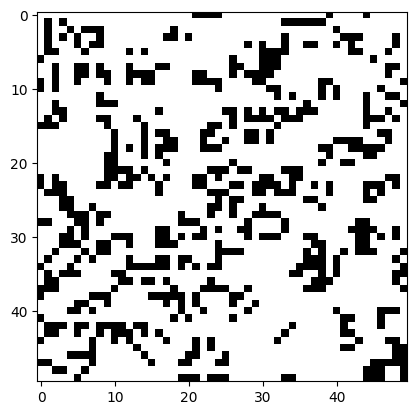

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def update_board(board):
    """
    Update the board based on the rules of the Game of Life.
    """
    # Count neighbors for each cell
    neighbors_count = (
        np.roll(board, 1, axis=0) + np.roll(board, -1, axis=0) +
        np.roll(board, 1, axis=1) + np.roll(board, -1, axis=1) +
        np.roll(np.roll(board, 1, axis=0), 1, axis=1) +
        np.roll(np.roll(board, 1, axis=0), -1, axis=1) +
        np.roll(np.roll(board, -1, axis=0), 1, axis=1) +
        np.roll(np.roll(board, -1, axis=0), -1, axis=1)
    )

    board_next = np.where((board == 1) & ((neighbors_count < 2) | (neighbors_count > 3)), 0, board)
    board_next = np.where((board == 0) & (neighbors_count == 3), 1, board_next)

    return board_next

board = np.random.choice([0, 1], size=(50, 50), p=[0.5, 0.5])

fig, ax = plt.subplots()

img = ax.imshow(board, cmap='binary', interpolation='nearest')

def animate(frame):
    global board
    board = update_board(board)
    img.set_array(board)
    return img,

ani = animation.FuncAnimation(fig, animate, frames=100, interval=100, blit=True)

plt.show()

#### 89. How to get the n largest values of an array (★★★)

In [ ]:
import numpy as np

def n_largest_values(arr, n):
    """
    Get the n largest values of an array.
    """
    indices = np.argpartition(arr, -n)[-n:]

    sorted_indices = indices[np.argsort(arr[indices])]

    largest_values = arr[sorted_indices]

    return largest_values

array = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3])

n = 3

result = n_largest_values(array, n)

#### 90. Given an arbitrary number of vectors, build the cartesian product (every combinations of every item) (★★★)

In [ ]:
import itertools

def cartesian_product(*arrays):
    """
    Build the cartesian product of an arbitrary number of vectors.
    """
    return list(itertools.product(*arrays))

# Example vectors
vector1 = [1, 2, 3]
vector2 = ['a', 'b']
vector3 = [True, False]

# Compute the cartesian product
result = cartesian_product(vector1, vector2, vector3)

#### 91. How to create a record array from a regular array? (★★★)

In [ ]:
import numpy as np

regular_array = np.array([[1, 'a', 3.0],
                          [2, 'b', 4.5],
                          [3, 'c', 6.2]])

field_names = ['integer_field', 'string_field', 'float_field']

record_array = np.rec.fromarrays(regular_array.T, names=field_names)

#### 92. Consider a large vector Z, compute Z to the power of 3 using 3 different methods (★★★)

In [ ]:
import numpy as np

# Define the large vector Z
Z = np.random.rand(1000000)  # Example large vector

# Compute Z to the power of 3 using np.power()
result1 = np.power(Z, 3)

#### 93. Consider two arrays A and B of shape (8,3) and (2,2). How to find rows of A that contain elements of each row of B regardless of the order of the elements in B? (★★★)

In [17]:
import numpy as np

A = np.random.randint(0, 10, size=(8, 3))
B = np.array([[1, 2],
              [4, 5]])

rows_containing_elements = []

for row_b in B:

    mask = np.all(np.isin(A, row_b), axis=1)
    rows_containing_elements.append(A[mask])

result = np.intersect1d(*rows_containing_elements)

#### 94. Considering a 10x3 matrix, extract rows with unequal values (e.g. [2,2,3]) (★★★)

In [18]:
import numpy as np

# Example matrix
matrix = np.array([[1, 2, 3],
                   [2, 2, 3],
                   [4, 5, 6],
                   [7, 7, 7],
                   [8, 8, 9],
                   [9, 9, 9]])

# Find unique rows
unique_rows = np.unique(matrix, axis=0)

# Filter rows with unequal values
unequal_rows = unique_rows[np.apply_along_axis(lambda row: len(np.unique(row)) != matrix.shape[1], axis=1, arr=unique_rows)]

#### 95. Convert a vector of ints into a matrix binary representation (★★★)

In [19]:
import numpy as np

def int_to_binary_matrix(vector):
    """
    Convert a vector of integers into a matrix of binary representation.
    """
    # Determine the number of bits required for the maximum integer in the vector
    max_value = np.max(vector)
    num_bits = int(np.ceil(np.log2(max_value + 1)))

    # Create a binary matrix with the same number of columns as bits
    binary_matrix = np.zeros((len(vector), num_bits), dtype=int)

    # Convert each integer to binary and store in the binary matrix
    for i, value in enumerate(vector):
        binary_matrix[i] = [int(bit) for bit in bin(value)[2:].zfill(num_bits)]

    return binary_matrix

# Example vector of integers
vector = np.array([1, 2, 3, 4, 5])

# Convert the vector to a binary matrix
binary_matrix = int_to_binary_matrix(vector)

#### 96. Given a two dimensional array, how to extract unique rows? (★★★)

In [20]:
import numpy as np

# Example two-dimensional array
array = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [1, 2, 3],
                  [7, 8, 9],
                  [4, 5, 6]])

# Extract unique rows
unique_rows = np.unique(array, axis=0)

#### 97. Considering 2 vectors A & B, write the einsum equivalent of inner, outer, sum, and mul function (★★★)

In [23]:
import numpy as np

# Given vectors A and B
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])

# Inner product
inner_product = np.einsum('i,i', A, B)
print("Inner product:", inner_product)

# Outer product
outer_product = np.einsum('i,j->ij', A, B)
print("Outer product:")
print(outer_product)

# Sum
sum_result = np.einsum('i', A)
print("Sum:", sum_result)

# Element-wise multiplication
elementwise_product = np.einsum('i,i->i', A, B)

Inner product: 32
Outer product:
[[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]
Sum: [1 2 3]


#### 98. Considering a path described by two vectors (X,Y), how to sample it using equidistant samples (★★★)?

In [24]:
import numpy as np

def sample_path_equidistant(X, Y, num_samples):
    # Compute the distances between consecutive points
    distances = np.sqrt(np.diff(X)**2 + np.diff(Y)**2)

    # Compute the total length of the path
    total_length = np.sum(distances)

    # Compute the step size for equidistant samples
    step_size = total_length / (num_samples - 1)

    # Initialize variables
    sampled_points = [(X[0], Y[0])]  # Include the first point
    current_length = 0
    current_index = 0

    # Sample equidistant points along the path
    while len(sampled_points) < num_samples:
        remaining_length = step_size - current_length

        # Find the index of the next point that meets or exceeds the remaining length
        while current_index < len(distances) and distances[current_index] < remaining_length:
            remaining_length -= distances[current_index]
            current_index += 1

        # Interpolate the coordinates of the next sampled point
        if current_index < len(distances):
            t = remaining_length / distances[current_index]
            x = X[current_index] * t + X[current_index + 1] * (1 - t)
            y = Y[current_index] * t + Y[current_index + 1] * (1 - t)
            sampled_points.append((x, y))

        # Update current length and index
        current_length = 0 if current_index >= len(distances) else distances[current_index] - remaining_length

    return np.array(sampled_points)

# Example vectors X and Y
X = np.array([0, 1, 3, 6, 9])
Y = np.array([0, 2, 4, 7, 10])

# Number of equidistant samples
num_samples = 10

# Sample the path
sampled_path = sample_path_equidistant(X, Y, num_samples)

#### 99. Given an integer n and a 2D array X, select from X the rows which can be interpreted as draws from a multinomial distribution with n degrees, i.e., the rows which only contain integers and which sum to n. (★★★)

In [25]:
import numpy as np

def select_multinomial_rows(X, n):
    # Check if each row contains only integers and sum to n
    mask = (X == X.astype(int)).all(axis=1) & (X.sum(axis=1) == n)

    # Select rows that meet the condition
    selected_rows = X[mask]

    return selected_rows

# Example 2D array X
X = np.array([[1, 2, 3],
              [0, 3, 5],
              [2, 2, 2],
              [4, 2, 1]])

# Integer n
n = 6

# Select rows representing draws from a multinomial distribution with n degrees
selected_rows = select_multinomial_rows(X, n)

#### 100. Compute bootstrapped 95% confidence intervals for the mean of a 1D array X (i.e., resample the elements of an array with replacement N times, compute the mean of each sample, and then compute percentiles over the means). (★★★)

In [26]:
import numpy as np

def bootstrap_confidence_intervals(X, N):

    resampled_means = np.empty(N)

    for i in range(N):
        resampled_data = np.random.choice(X, size=len(X), replace=True)
        resampled_means[i] = np.mean(resampled_data)

    lower_bound = np.percentile(resampled_means, 2.5)
    upper_bound = np.percentile(resampled_means, 97.5)

    return lower_bound, upper_bound

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Number of bootstrap samples
N = 1000

# Compute bootstrapped 95% confidence intervals
lower_bound, upper_bound = bootstrap_confidence_intervals(X, N)